In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [3]:
df = pd.read_csv('dataset/Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


- Here we will only try to predict the opening of the stock price.
- so we don't need the other coulmns in the training.

In [4]:
# getting the opening coulmn as numpy array
training_set = df.iloc[:, 1:2].values
training_set[1:5]

array([[331.27],
       [329.83],
       [328.34],
       [322.04]])

### Scalling the data
- Using noramlization here as it's recommended to use with rnn and sigmoid

In [5]:
sc = MinMaxScaler()
training_set_sc = sc.fit_transform(training_set)
training_set_sc[1:5]

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

- specifing the timesteps to be 60 
> That means when trying to predict the next day opening price our model will look at the previous 3 months as the month here consists of 20 days  

- So let's make our x_train and y_train based on that

In [6]:
X_train = []
y_train = []
for i in range(60, len(training_set_sc)):
    X_train.append(training_set_sc[(i - 60):i, 0])
    y_train.append(training_set_sc[i, 0]) # getting the 60th element as the next timesrtep as it's the 61 element

# converting them to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
print(f'The shape of our X_train is {X_train.shape}')
print(f'That is the value of the next timestep {y_train[0]} \ngiven this sequance:\n {X_train[0]}')

The shape of our X_train is (1198, 60)
That is the value of the next timestep 0.08627874097775134 
given this sequance:
 [0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]


- What I am trying to show is that we will get from our data set two new datastructure
    - `X_train`: as it represents the timestep that i will use to predict the next timestep
    - `y_train`: as the actual value for the day from the previous 60 opening day

### Reshaping our input for keras
- The expected input for keras is `(batch_sz, timestep, indicators)` for our case -> `(1198, 60, 1)`
    - 1198 as the number of records that we have
    - 1 as we depend on one coulmn to predict our next timestep

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f'That is the new shape of our data {X_train.shape}')

That is the new shape of our data (1198, 60, 1)


In [16]:
regressor = Sequential()

#### Creating our stacked LSTM

In [17]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# return_sequences only show that I'm gonna use another lstm layer after this one and it has false value by default
regressor.add(Dropout(rate=0.2))

# 2nd lstm lyr
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# 3rd lstm lyr
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# 4th lstm lyr
regressor.add(LSTM(units=50, return_sequences=False)) # as that is the last one
regressor.add(Dropout(rate=0.2))

# output lyr
regressor.add(Dense(units=1)) # as that is the last one

In [18]:
# Compile our model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train our model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0457
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0056
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0017
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0014


In [21]:
#Getting the real stock price for jan 2017
df_real = pd.read_csv('dataset/Google_Stock_Price_Test.csv')
real_stock_price = df_real.iloc[:, 1:2].values

### Getting the predicted stock price for jan 2017
- First we should concate our df_real and df
- concate the open coulmn from the training and testing data set

In [28]:
df_total = pd.concat((df['Open'], df_real['Open']), axis=0)
inputs = df_total[(len(df_total) - len(df_real) - 60):].values
inputs = inputs.reshape(-1, 1)
print(inputs.shape)
#Scalling
inputs = sc.transform(inputs)

(80, 1)


In [29]:
#using the same technique as before to prepare the test dataset
X_test = []

for i in range(60, 80):
    X_test.append(inputs[(i - 60):i, 0])

# converting them to numpy array
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [30]:
predict_stock_price = regressor.predict(X_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)

In [31]:
predict_stock_price.shape

(20, 1)

In [33]:
print(predict_stock_price[0:5])

[[788.3533 ]
 [785.4217 ]
 [786.5729 ]
 [789.145  ]
 [793.06165]]


### Visualizing the results

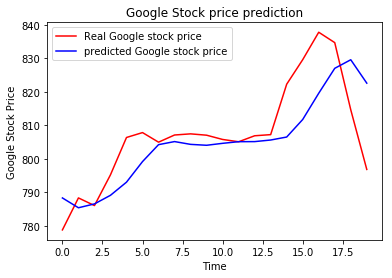

In [34]:
plt.plot(real_stock_price, color='red', label='Real Google stock price')
plt.plot(predict_stock_price, color='blue', label='predicted Google stock price')
plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### From what we see in the figure
- The predicted one is so close to the real stock price in value
- and it is actually taking the same shape 

Thanks for reading   
Hope you enjoyed it  
Peace ^_^